In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistics-fleet-data/DimensionTables.xlsx
/kaggle/input/logistics-fleet-data/fFreight.csv
/kaggle/input/logistics-fleet-data/fCosts.xlsx


# **"Fleet Performance Optimization: A Data-Driven Analysis of Costs, Efficiency, and Profitability"**

# **Introduction**

Efficient fleet management is essential for optimizing operational performance and maximizing profitability in the logistics and transportation industry. This project aims to analyze key operational, customer, and financial data to uncover insights that drive data-informed decision-making. By leveraging information from truck operations and customer shipments, the study focuses on identifying trends, inefficiencies, and opportunities for optimization.

The project seeks to address the following core questions:

**Impact of Performance Metrics:** How do truck-level indicators such as fuel efficiency, maintenance costs, and distance traveled affect overall profitability?

**Geographic and Customer Patterns:** What are the regional and customer distribution trends, and how do they influence operational strategies?

**Drivers of Efficiency and Revenue:** Which operational parameters most strongly determine cost efficiency and revenue generation, and how can underperforming trucks or regions be improved?

Through the application of statistical analysis and visualization techniques, the project examines correlations, trends, and anomalies across critical metrics such as kilometers traveled, fuel consumption, maintenance expenses, net profit, and cost per kilometer.


# Project Dataset

The analysis integrates data from multiple sources obtained from Kaggle:

* Cost Data: Includes fuel, maintenance, and fixed costs associated with each trip.
* Freight Data: Tracks revenue, weight, and goods value for each freight order.
* Dimension Tables: Provides metadata on drivers, vehicles, and customer locations.

By combining these datasets, the project calculates key performance metrics such as:

* Cost per Kilometer
* Revenue per Kilogram
* Profit Margins (by route, truck, and customer location)

The findings are presented through clear and interactive visualizations, enabling data-driven decision-making and providing actionable insights for operational improvement

# Project Goals

The primary goals of this project are:-

**1. Optimize Truck Performance:**
Identify key factors that impact truck performance, including fuel efficiency, maintenance, and distance traveled, to enhance operational efficiency.

**2. Analyze Operational Costs:**
Evaluate costs such as Cost per Kilometer and Maintenance per Kilometer to uncover inefficiencies and areas for cost reduction.

**3. Assess Profitability Drivers:**
Explore relationships between operational metrics (e.g., kilometers traveled, fixed costs, fuel consumption) and profitability (net profit) to identify opportunities for improving financial performance.

**4. Geographical Customer Distribution:**
Analyze customer distribution patterns and city-wise contributions to revenue and goods value, enabling better resource allocation and strategic planning.

**5. Provide Actionable Recommendations:**
Summarize insights into practical recommendations that help stakeholders enhance fleet performance, reduce costs, and drive long-term strategic improvements.

# **Step 1: Data Preparation and Cleaning** 


# (i). **Loading libraries**

In [3]:
 import pandas as pd
 import numpy as np
 import matplotlib
 import matplotlib.pyplot as plt
 plt.style.use('ggplot')
 from matplotlib.pyplot import figure
 import seaborn as sns

# (ii).**Loading all dataset**

In [4]:

dimension_tab = pd.read_excel('/kaggle/input/logistics-fleet-data/DimensionTables.xlsx')
dimension_tab2 = pd.read_excel('/kaggle/input/logistics-fleet-data/DimensionTables.xlsx', sheet_name = 'Vehicles')
dimension_tab3 = pd.read_excel('/kaggle/input/logistics-fleet-data/DimensionTables.xlsx', sheet_name = 'Customers')
f_cost_1 = pd.read_excel('/kaggle/input/logistics-fleet-data/fCosts.xlsx')
f_details_1 = pd.read_csv('/kaggle/input/logistics-fleet-data/fFreight.csv')

# (iii) **Dataset attributes**

In [5]:
f_cost_1.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
2,2018-01-01 00:00:00,2,2,4594,1303.06,4077.49,1011.93,10502.595165


In [6]:
f_details_1.head(3)

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value
0,2018/01/02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,"7,42","2,5",3,"247,39"
1,2018/01/02,22346,23,774507,02/01/2018:MMA-4836,Enders,"3,54","2,62",3,"118,05"
2,2018/01/02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,"8,98","5,54",9,"299,01"


In [7]:
dimension_tab

,Driver ID,Driver
0,1,No Driver
1,2,Ridwan Greaves
2,3,Efan Archer
3,4,Karol Woods
4,5,Amman Vega
5,6,Sol Porter
6,7,Nikola Weiss
7,8,Tierney Reynolds
8,9,Kenzie Macdonald
9,10,Anton Garza


In [8]:
dimension_tab2

,Truck ID,Plate,Brand,Truck Type,Trailers Type,Year
0,2,MJD-6976,VW,SEMI-TRAILER,Reefer,2011
1,3,MJT-4829,VW,SEMI-TRAILER,Reefer,2010
2,4,MHJ-9634,VW,TRAILER,Reefer,2009
3,5,MKP-6610,VW,TRAILER,Reefer,2006
4,6,MHN-5539,VW,BOX,Fridge,2010
5,7,MJT-5239,VW,BOX,Reefer,2009
6,17,MJI-0517,VW,TRACTOR,Dry,2011
7,18,MLX-5112,VW,TRACTOR,Dry,2013
8,19,MDB-1602,VW,BOX,Reefer,2013
9,20,MML-5482,VW,TRAILER,Reefer,2013


In [9]:
dimension_tab3

,Customer ID,City,State,Latitude,Longitude
0,5,Mineola,KY,38.8881,-91.5714
1,6,Mineola,KY,38.8881,-91.5714
2,21,Mineola,KY,38.8881,-91.5714
3,34,Mineola,KY,38.8881,-91.5714
4,43,Mineola,KY,38.8881,-91.5714
...,...,...,...,...,...
43905,43898,Dalecrest,OH,38.8144,-77.1039
43906,43899,Glen Isle,DE,38.9578,-76.5906
43907,43901,Milne,IN,39.2631,-88.7922
43908,43905,Campbellsville,WY,37.3433,-85.3419


# (IV) **Check for Null Values in dataset**

In [10]:
f_details_1.isnull().sum()

Date              0
Customer ID       0
Truck ID          0
Invoice Number    0
Freight ID        0
City              0
Net Revenue       0
Weight (Kg)       0
Weight (Cubic)    0
Goods Value       0
dtype: int64

In [11]:
f_cost_1.isnull().sum()


Unnamed: 0    1
Unnamed: 1    3
Unnamed: 2    3
Unnamed: 3    3
Unnamed: 4    3
Unnamed: 5    3
Unnamed: 6    3
Unnamed: 7    3
dtype: int64

In [12]:
dimension_tab.isnull().sum()

Driver ID    0
Driver       0
dtype: int64

In [13]:
dimension_tab2.isnull().sum()

Truck ID         0
Plate            0
Brand            0
Truck Type       0
Trailers Type    0
Year             0
dtype: int64

In [14]:
dimension_tab3.isnull().sum()

Customer ID    0
City           0
State          0
Latitude       0
Longitude      0
dtype: int64

# (V) **Drop  null Values**

In [15]:
f_cost_1 = f_cost_1.dropna()

# (VI) Assign Headers

**f_cost_1 has headers on the second row. moving this to top position**

In [16]:
f_cost_1.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
2,2018-01-01 00:00:00,2,2,4594,1303.06,4077.49,1011.93,10502.595165
3,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
4,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331
5,2018-01-01 00:00:00,19,11,2724,669.73,2123.58,560.17,7428.016155


In [17]:
f_cost_1.columns = ['Date', 'Truck ID', 'Drive ID', 'KM Traveled', 'Liters', 'Fuel', 'Maintenance', 'Fixed Costs']
f_cost_1

,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
1,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
2,2018-01-01 00:00:00,2,2,4594,1303.06,4077.49,1011.93,10502.595165
3,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
4,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331
5,2018-01-01 00:00:00,19,11,2724,669.73,2123.58,560.17,7428.016155
...,...,...,...,...,...,...,...,...
295,2019-08-01 00:00:00,4,7,2202,467.56,1483.95,869.21,7870.687635
296,2019-08-01 00:00:00,34,13,5221,1174.76,3895.92,1148.01,8947.469745
297,2019-08-01 00:00:00,17,5,4468,1992.37,6319.54,1565.36,11456.70372
298,2019-08-01 00:00:00,23,31,3568,757.22,2434.89,510.34,7487.371638


In [18]:
f_cost_2 = f_cost_1.drop(index = 1)
f_cost_2.reset_index()
f_cost_2

,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
2,2018-01-01 00:00:00,2,2,4594,1303.06,4077.49,1011.93,10502.595165
3,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
4,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331
5,2018-01-01 00:00:00,19,11,2724,669.73,2123.58,560.17,7428.016155
6,2018-01-01 00:00:00,20,12,3862,723.02,2378.19,648.11,6735.388638
...,...,...,...,...,...,...,...,...
295,2019-08-01 00:00:00,4,7,2202,467.56,1483.95,869.21,7870.687635
296,2019-08-01 00:00:00,34,13,5221,1174.76,3895.92,1148.01,8947.469745
297,2019-08-01 00:00:00,17,5,4468,1992.37,6319.54,1565.36,11456.70372
298,2019-08-01 00:00:00,23,31,3568,757.22,2434.89,510.34,7487.371638


# (VII) **Check datasets for duplicates**

In [19]:
f_cost_2[f_cost_2.duplicated()]


,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs


In [20]:
f_details_1[f_details_1.duplicated()]

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value


# (VIII) **Convert to Date and Numerical Columns**

In [21]:
f_cost_2.dtypes


Date           object
Truck ID       object
Drive ID       object
KM Traveled    object
Liters         object
Fuel           object
Maintenance    object
Fixed Costs    object
dtype: object

In [22]:
f_cost_2[f_cost_2['Date'].isna()]

,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs


In [23]:
f_cost_2.iloc[185:196]

,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
187,2018-12-01 00:00:00,19,11,5037,1242.87,4419.22,724.18,8412.45
188,2018-12-01 00:00:00,20,12,4382,755.66,2795.55,817.84,14517.15
189,2018-12-01 00:00:00,22,14,5287,1026.61,3684.6,578.29,15241.35
190,2018-12-01 00:00:00,29,21,2533,496.55,1857.72,746.49,17832.15
193,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
194,2019-01-01 00:00:00,2,2,4885,1418.95,4633.13,1276.02,12979.5
195,2019-01-01 00:00:00,17,5,6579,2274.89,7828.74,1651.64,8407.35
196,2019-01-01 00:00:00,19,11,5037,1242.87,4419.22,724.18,14930.25
197,2019-01-01 00:00:00,20,12,4382,755.66,2795.55,817.84,12336.9
198,2019-01-01 00:00:00,22,14,5287,1026.61,3684.6,578.29,13665.45


In [24]:
f_cost_2.drop([193], axis= 0, inplace = True)


In [25]:
f_cost_2.iloc[185:196]

,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
187,2018-12-01 00:00:00,19,11,5037,1242.87,4419.22,724.18,8412.45
188,2018-12-01 00:00:00,20,12,4382,755.66,2795.55,817.84,14517.15
189,2018-12-01 00:00:00,22,14,5287,1026.61,3684.6,578.29,15241.35
190,2018-12-01 00:00:00,29,21,2533,496.55,1857.72,746.49,17832.15
194,2019-01-01 00:00:00,2,2,4885,1418.95,4633.13,1276.02,12979.5
195,2019-01-01 00:00:00,17,5,6579,2274.89,7828.74,1651.64,8407.35
196,2019-01-01 00:00:00,19,11,5037,1242.87,4419.22,724.18,14930.25
197,2019-01-01 00:00:00,20,12,4382,755.66,2795.55,817.84,12336.9
198,2019-01-01 00:00:00,22,14,5287,1026.61,3684.6,578.29,13665.45
199,2019-01-01 00:00:00,29,21,2533,496.55,1857.72,746.49,11347.5


In [26]:
f_cost_2.dtypes


Date           object
Truck ID       object
Drive ID       object
KM Traveled    object
Liters         object
Fuel           object
Maintenance    object
Fixed Costs    object
dtype: object

In [27]:
f_cost_2['Date'] = pd.to_datetime(f_cost_2['Date'])
f_cost_2['KM Traveled'] = f_cost_2['KM Traveled'].astype(str).astype(int)
f_cost_2['Liters'] = f_cost_2['Liters'].astype(str).astype(float)
f_cost_2['Fuel'] = f_cost_2['Fuel'].astype(str).astype(float)
f_cost_2['Maintenance'] = f_cost_2['Maintenance'].astype(str).astype(float)
f_cost_2['Fixed Costs'] = f_cost_2['Fixed Costs'].astype(str).astype(float)

In [28]:
f_cost_2.dtypes


Date           datetime64[ns]
Truck ID               object
Drive ID               object
KM Traveled             int64
Liters                float64
Fuel                  float64
Maintenance           float64
Fixed Costs           float64
dtype: object

In [29]:
f_details_1


,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value
0,2018/01/02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,"7,42","2,5",3,"247,39"
1,2018/01/02,22346,23,774507,02/01/2018:MMA-4836,Enders,"3,54","2,62",3,"118,05"
2,2018/01/02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,"8,98","5,54",9,"299,01"
3,2018/01/02,1929,23,774626,02/01/2018:MMA-4836,Enders,"12,49","7,8",9,"416,27"
4,2018/01/02,6198,23,774623,02/01/2018:MMA-4836,Enders,"2,49","8,55",9,"82,9"
...,...,...,...,...,...,...,...,...,...,...
92055,2019/08/31,23984,19,1049953,31/08/2019:MDB-1602,Bloom,"63,86","77,13","77,13","4763,67"
92056,2019/08/31,23984,23,1049950,31/08/2019:MMA-4836,Bloom,"63,86","128,86","128,86","7792,43"
92057,2019/08/31,23984,23,1049949,31/08/2019:MMA-4836,Bloom,"63,86","333,63","333,63","14376,69"
92058,2019/08/31,23984,45,1049954,31/08/2019:QJP-8960,Bloom,"63,86","85,52","85,52","5886,72"


In [30]:
f_details_1.dtypes


Date              object
Customer ID        int64
Truck ID           int64
Invoice Number     int64
Freight ID        object
City              object
Net Revenue       object
Weight (Kg)       object
Weight (Cubic)    object
Goods Value       object
dtype: object

In [31]:
f_details_1['Net Revenue'] = f_details_1['Net Revenue'].replace(',', '.',regex= True)
f_details_1['Weight (Kg)'] = f_details_1['Weight (Kg)'].replace(',', '.',regex= True)
f_details_1['Weight (Cubic)'] = f_details_1['Weight (Cubic)'].replace(',', '.',regex= True)
f_details_1['Goods Value'] = f_details_1['Goods Value'].replace(',', '',regex= True)
f_details_1.head(4)

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value
0,2018/01/02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,7.42,2.5,3,24739
1,2018/01/02,22346,23,774507,02/01/2018:MMA-4836,Enders,3.54,2.62,3,11805
2,2018/01/02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,8.98,5.54,9,29901
3,2018/01/02,1929,23,774626,02/01/2018:MMA-4836,Enders,12.49,7.8,9,41627


In [32]:
f_details_1['Date'] = pd.to_datetime(f_details_1['Date'])
f_details_1['Net Revenue'] = f_details_1['Net Revenue'].astype(str).astype(float)
f_details_1['Weight (Kg)'] = f_details_1['Weight (Kg)'].astype(str).astype(float)
f_details_1['Weight (Cubic)'] = f_details_1['Weight (Cubic)'].astype(str).astype(float)
f_details_1['Goods Value'] = f_details_1['Goods Value'].astype(str).astype(float)
f_details_1['Year'] = f_details_1['Date'].dt.year

In [33]:
f_details_1['Net Revenue'] = f_details_1['Net Revenue'] *1000
f_details_1

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,Year
0,2018-01-02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,7420.0,2.50,3.00,24739.0,2018
1,2018-01-02,22346,23,774507,02/01/2018:MMA-4836,Enders,3540.0,2.62,3.00,11805.0,2018
2,2018-01-02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,8980.0,5.54,9.00,29901.0,2018
3,2018-01-02,1929,23,774626,02/01/2018:MMA-4836,Enders,12490.0,7.80,9.00,41627.0,2018
4,2018-01-02,6198,23,774623,02/01/2018:MMA-4836,Enders,2490.0,8.55,9.00,829.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
92055,2019-08-31,23984,19,1049953,31/08/2019:MDB-1602,Bloom,63860.0,77.13,77.13,476367.0,2019
92056,2019-08-31,23984,23,1049950,31/08/2019:MMA-4836,Bloom,63860.0,128.86,128.86,779243.0,2019
92057,2019-08-31,23984,23,1049949,31/08/2019:MMA-4836,Bloom,63860.0,333.63,333.63,1437669.0,2019
92058,2019-08-31,23984,45,1049954,31/08/2019:QJP-8960,Bloom,63860.0,85.52,85.52,588672.0,2019


In [34]:
f_details_1.dtypes


Date              datetime64[ns]
Customer ID                int64
Truck ID                   int64
Invoice Number             int64
Freight ID                object
City                      object
Net Revenue              float64
Weight (Kg)              float64
Weight (Cubic)           float64
Goods Value              float64
Year                       int32
dtype: object

# **Step 2: Data Merging**


# (I) *Merge dimension tables with the cost and freight deiails datasets*

# (II) *Renaming column*

In [35]:
f_details_2 = f_details_1.merge(dimension_tab2,how = 'left', on = 'Truck ID' )
f_details_3 = f_details_2.merge(dimension_tab3,how = 'left', on = 'Customer ID' )
f_details_4 = f_details_3.rename(columns={"Year_x": "Year", "Year_y": "Truck Age" , 'City_x' : 'City'})
f_details_4.drop('City_y', axis = 1, inplace = True)
f_details_4.head()

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,Year,Plate,Brand,Truck Type,Trailers Type,Truck Age,State,Latitude,Longitude
0,2018-01-02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,7420.0,2.50,3.0,24739.0,2018,MMA-5946,VW,TRAILER,Fridge,2014,OK,35.1214,-77.8661
1,2018-01-02,22346,23,774507,02/01/2018:MMA-4836,Enders,3540.0,2.62,3.0,11805.0,2018,MMA-4836,VW,TRAILER,Fridge,2014,WV,35.3267,-92.2283
2,2018-01-02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,8980.0,5.54,9.0,29901.0,2018,MMA-4836,VW,TRAILER,Fridge,2014,OK,38.6636,-78.6264
3,2018-01-02,1929,23,774626,02/01/2018:MMA-4836,Enders,12490.0,7.80,9.0,41627.0,2018,MMA-4836,VW,TRAILER,Fridge,2014,WV,35.3267,-92.2283
4,2018-01-02,6198,23,774623,02/01/2018:MMA-4836,Enders,2490.0,8.55,9.0,829.0,2018,MMA-4836,VW,TRAILER,Fridge,2014,WV,35.3267,-92.2283


In [36]:
f_details_4_Trips = f_details_4.groupby('Truck Type')['Plate'].count()
f_details_4_Trips1 = f_details_4_Trips.reset_index()
f_details_4_Trips1

,Truck Type,Plate
0,BOX,15153
1,SEMI-TRAILER,2941
2,TRACTOR,711
3,TRAILER,73255


In [37]:
f_cost_3 = f_cost_2.merge(dimension_tab2, how = 'left', on = 'Truck ID')
f_cost_4 = f_cost_3.rename(columns={"Drive ID": "Driver ID"})
f_cost_4 = f_cost_4.merge(dimension_tab, how = 'left', on = 'Driver ID')
f_cost_4.head(3)

,Date,Truck ID,Driver ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Plate,Brand,Truck Type,Trailers Type,Year,Driver
0,2018-01-01,2,2,4594,1303.06,4077.49,1011.93,10502.595165,MJD-6976,VW,SEMI-TRAILER,Reefer,2011,Ridwan Greaves
1,2018-01-01,6,4,3816,899.14,2813.70,1561.78,6092.156655,MHN-5539,VW,BOX,Fridge,2010,Karol Woods
2,2018-01-01,17,9,7116,2128.46,6491.00,1324.12,11930.903310,MJI-0517,VW,TRACTOR,Dry,2011,Kenzie Macdonald


# **Step 3: Group data by Truck, Driver, Truck type and City**


# (I) **Groupby Truck**

In [38]:
f_cost_TruckID = f_cost_4.groupby(['Truck ID','Truck Type','Plate'])[['KM Traveled', 'Liters', 'Fuel', 'Maintenance', 'Fixed Costs']].sum()
f_details_TruckID = f_details_4.groupby(['Truck ID','Truck Type','Plate'])[['Net Revenue', 'Weight (Kg)', 'Weight (Cubic)', 'Goods Value']].sum()
merged_log = f_cost_TruckID.merge(f_details_TruckID, how='inner', on=['Truck ID', 'Truck Type', 'Plate'])
merged_log.head(3)

,,,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value
Truck ID,Truck Type,Plate,,,,,,,,,
2,SEMI-TRAILER,MJD-6976,114009,33094.54,108155.36,27103.87,239869.274910,466361310.0,834676.98,1177795.15,802557251.0
3,SEMI-TRAILER,MJT-4829,69724,19712.35,64660.08,22806.11,147388.142915,486007640.0,910298.31,1254899.18,999333828.0
4,TRAILER,MHJ-9634,48501,8422.50,26939.54,16228.87,111750.936440,244193290.0,293797.25,440123.92,585429659.0


# (II) **Groupby Driver**


In [39]:
f_cost_DriverID = f_cost_4.groupby(['Driver ID'])[['KM Traveled', 'Liters', 'Fuel', 'Maintenance', 'Fixed Costs']].sum().reset_index()
f_cost_DriverID = f_cost_DriverID.merge(dimension_tab, on = 'Driver ID', how = 'left')
f_cost_DriverID

,Driver ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Driver
0,1,84336,22028.36,69797.78,41069.24,273320.170825,No Driver
1,2,114009,33094.54,108155.36,27103.87,239869.274910,Ridwan Greaves
2,3,59494,10358.11,33160.48,13806.50,114788.698931,Efan Archer
3,4,7073,1762.95,5748.80,4930.71,18515.803965,Karol Woods
4,5,111137,36588.74,122235.96,28661.27,242129.188770,Amman Vega
5,7,11503,2194.32,7199.44,5095.61,37243.433184,Nikola Weiss
6,8,19657,4303.04,14680.56,2498.39,33740.669355,Tierney Reynolds
7,9,27457,8002.54,25388.01,9709.26,71905.317360,Kenzie Macdonald
8,11,109887,26421.19,90907.54,15013.73,204298.573530,Maheen Nicholls
9,12,89585,15622.88,55212.11,15513.38,210121.696930,Stevie Schofield


# (III) **Groupby City**

In [40]:
dimension_tab3_city_group = dimension_tab3.groupby(['City','Latitude', 'Longitude'])['Customer ID'].nunique().reset_index()
dimension_tab3_city_group

,City,Latitude,Longitude,Customer ID
0,Aa Junction,36.0797,-90.9397,24
1,Airport Road Addition,27.2197,-98.0992,15
2,Alfalfa Center,40.6922,-99.1789,34
3,Alpaugh,35.8878,-119.4860,110
4,Altamaha Park,31.4264,-81.6072,54
...,...,...,...,...
549,Woodlawn Manor,38.7111,-77.1192,24
550,Woodlyn,39.5700,-83.1142,54
551,Woodstock,43.4725,-90.4272,59
552,Woolworth,31.6331,-90.2733,1


**Coustomer id = Unique Costomers**

In [41]:
f_details_CustomerID = f_details_4.groupby(['City'])[['Weight (Kg)', 'Weight (Cubic)', 'Goods Value']].sum().reset_index()
f_details_CustomerID

,City,Weight (Kg),Weight (Cubic),Goods Value
0,Aa Junction,4443.98,4684.65,3216402.0
1,Airport Road Addition,1176.30,1526.60,1987116.0
2,Alfalfa Center,434.91,736.19,446595.0
3,Alpaugh,1057.80,1099.53,348749.0
4,Altamaha Park,10853.40,15131.79,19408312.0
...,...,...,...,...
288,Woodford,66.02,104.93,221160.0
289,Woodland Heights,39954.94,56373.26,60900989.0
290,Woodlawn Manor,86.84,94.14,47349.0
291,Woodstock,461.59,746.86,523096.0


In [42]:
f_details_CustomerID = f_details_4.groupby(['City'])[['Weight (Kg)', 'Weight (Cubic)', 'Goods Value']].sum().reset_index()
f_details_CustomerID = f_details_CustomerID.merge(dimension_tab3_city_group, on = 'City', how = 'left')
f_details_CustomerID

,City,Weight (Kg),Weight (Cubic),Goods Value,Latitude,Longitude,Customer ID
0,Aa Junction,4443.98,4684.65,3216402.0,36.0797,-90.9397,24
1,Airport Road Addition,1176.30,1526.60,1987116.0,27.2197,-98.0992,15
2,Alfalfa Center,434.91,736.19,446595.0,40.6922,-99.1789,34
3,Alpaugh,1057.80,1099.53,348749.0,35.8878,-119.4860,110
4,Altamaha Park,10853.40,15131.79,19408312.0,31.4264,-81.6072,54
...,...,...,...,...,...,...,...
291,Woodford,66.02,104.93,221160.0,33.4042,-86.7236,4
292,Woodland Heights,39954.94,56373.26,60900989.0,33.3903,-111.7570,331
293,Woodlawn Manor,86.84,94.14,47349.0,38.7111,-77.1192,24
294,Woodstock,461.59,746.86,523096.0,43.4725,-90.4272,59


# **Step 4: Calculation of Key Metrics**



**1. Calculate Kilometer per liter**

**2. Calculate Maintenance per KM**

**3. Calculate Total costs**

**4. Calculate Costs per KM**

**5. Calculate Costs per KG**

**6. Calculate Revenue per KM**

**7. Calculate Revenue per kg**

**8. Calculate Net profit**


In [43]:
merged_log['KM per Liter'] = merged_log['KM Traveled'] / merged_log['Liters']
merged_log['Maintenance per KM'] = merged_log['Maintenance'] / merged_log['KM Traveled']
merged_log['Total Costs'] = merged_log['Fuel'] + merged_log['Maintenance'] + merged_log['Fixed Costs'].astype(int)
merged_log['Costs per KM'] = merged_log['Total Costs'] / merged_log['KM Traveled']
merged_log['Costs per kg'] = merged_log['Total Costs'] / merged_log['Weight (Kg)']
merged_log['Revenue per KM'] = merged_log['Net Revenue'] / merged_log['KM Traveled']
merged_log['Revenue per kg'] = merged_log['Maintenance'] / merged_log['Weight (Kg)']
merged_log['Net Profit'] = merged_log['Net Revenue'] - merged_log['Total Costs'].astype(int)
merged_log['Fuel costs per KM'] = merged_log['Fuel'] / merged_log['KM Traveled']
merged_log['Fixed costs per KM'] = merged_log['Fixed Costs'] / merged_log['KM Traveled']

merged_log.head()

,,,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Net Profit,Fuel costs per KM,Fixed costs per KM
Truck ID,Truck Type,Plate,,,,,,,,,,,,,,,,,,,
2,SEMI-TRAILER,MJD-6976,114009,33094.54,108155.36,27103.87,239869.274910,466361310.0,834676.98,1177795.15,802557251.0,3.444949,0.237734,375128.23,3.290339,0.449429,4090.565745,0.032472,465986182.0,0.948656,2.103950
3,SEMI-TRAILER,MJT-4829,69724,19712.35,64660.08,22806.11,147388.142915,486007640.0,910298.31,1254899.18,999333828.0,3.537072,0.327091,234854.19,3.368341,0.257997,6970.449773,0.025053,485772786.0,0.927372,2.113880
4,TRAILER,MHJ-9634,48501,8422.50,26939.54,16228.87,111750.936440,244193290.0,293797.25,440123.92,585429659.0,5.758504,0.334609,154918.41,3.194128,0.527297,5034.809385,0.055238,244038372.0,0.555443,2.304096
5,TRAILER,MKP-6610,16735,3177.24,10218.76,7748.33,51577.283463,53182760.0,68609.53,102554.03,173361172.0,5.267150,0.463001,69544.09,4.155607,1.013621,3177.936062,0.112934,53113216.0,0.610622,3.082001
6,BOX,MHN-5539,4823,1143.32,3569.24,3657.55,12479.978310,28282360.0,72960.54,90088.20,64689088.0,4.218417,0.758356,19705.79,4.085795,0.270088,5864.059714,0.050131,28262655.0,0.740046,2.587597


In [44]:
merged_log2 = merged_log.reset_index()
merged_log.head()

,,,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Net Profit,Fuel costs per KM,Fixed costs per KM
Truck ID,Truck Type,Plate,,,,,,,,,,,,,,,,,,,
2,SEMI-TRAILER,MJD-6976,114009,33094.54,108155.36,27103.87,239869.274910,466361310.0,834676.98,1177795.15,802557251.0,3.444949,0.237734,375128.23,3.290339,0.449429,4090.565745,0.032472,465986182.0,0.948656,2.103950
3,SEMI-TRAILER,MJT-4829,69724,19712.35,64660.08,22806.11,147388.142915,486007640.0,910298.31,1254899.18,999333828.0,3.537072,0.327091,234854.19,3.368341,0.257997,6970.449773,0.025053,485772786.0,0.927372,2.113880
4,TRAILER,MHJ-9634,48501,8422.50,26939.54,16228.87,111750.936440,244193290.0,293797.25,440123.92,585429659.0,5.758504,0.334609,154918.41,3.194128,0.527297,5034.809385,0.055238,244038372.0,0.555443,2.304096
5,TRAILER,MKP-6610,16735,3177.24,10218.76,7748.33,51577.283463,53182760.0,68609.53,102554.03,173361172.0,5.267150,0.463001,69544.09,4.155607,1.013621,3177.936062,0.112934,53113216.0,0.610622,3.082001
6,BOX,MHN-5539,4823,1143.32,3569.24,3657.55,12479.978310,28282360.0,72960.54,90088.20,64689088.0,4.218417,0.758356,19705.79,4.085795,0.270088,5864.059714,0.050131,28262655.0,0.740046,2.587597


In [45]:
pd.set_option('display.max_columns', None)
merged_log2.head(2)

,Truck ID,Truck Type,Plate,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Net Profit,Fuel costs per KM,Fixed costs per KM
0,2,SEMI-TRAILER,MJD-6976,114009,33094.54,108155.36,27103.87,239869.274910,466361310.0,834676.98,1177795.15,802557251.0,3.444949,0.237734,375128.23,3.290339,0.449429,4090.565745,0.032472,465986182.0,0.948656,2.10395
1,3,SEMI-TRAILER,MJT-4829,69724,19712.35,64660.08,22806.11,147388.142915,486007640.0,910298.31,1254899.18,999333828.0,3.537072,0.327091,234854.19,3.368341,0.257997,6970.449773,0.025053,485772786.0,0.927372,2.11388


# **Step 5: Analysis**


# (I) **Calculate and Analyze** 
**Costs per Kilometer**
**Maintenance per KM and**
**Fuel cost per KM by truck type**
**then merge tables to enable visualization**

In [46]:
truck_type_analysis = merged_log2.groupby('Truck Type')[['Costs per KM', 'Maintenance per KM', 'Fuel costs per KM', 'Fixed costs per KM']].mean()
truck_type_analysis

,Costs per KM,Maintenance per KM,Fuel costs per KM,Fixed costs per KM
Truck Type,,,,
BOX,3.306925,0.310087,0.786603,2.210279
SEMI-TRAILER,6.939472,0.759358,0.962976,5.217153
TRACTOR,3.701182,0.299977,1.119682,2.281525
TRAILER,3.133930,0.228937,0.621443,2.283565


<Axes: xlabel='Truck Type'>

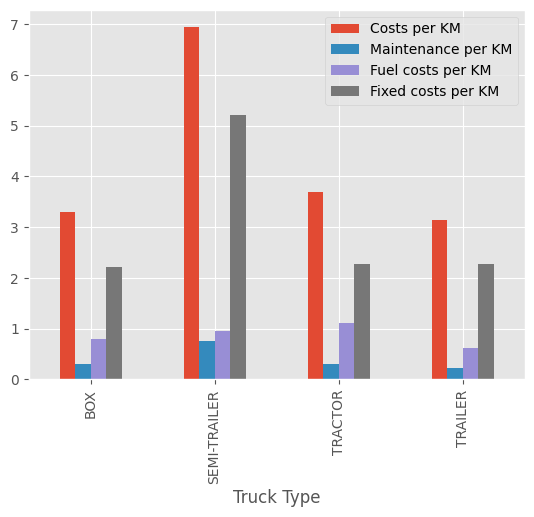

In [47]:
truck_type_analysis.plot(kind = 'bar')

# (II) *Create a Box plot to compare Costs per KM across truck types*

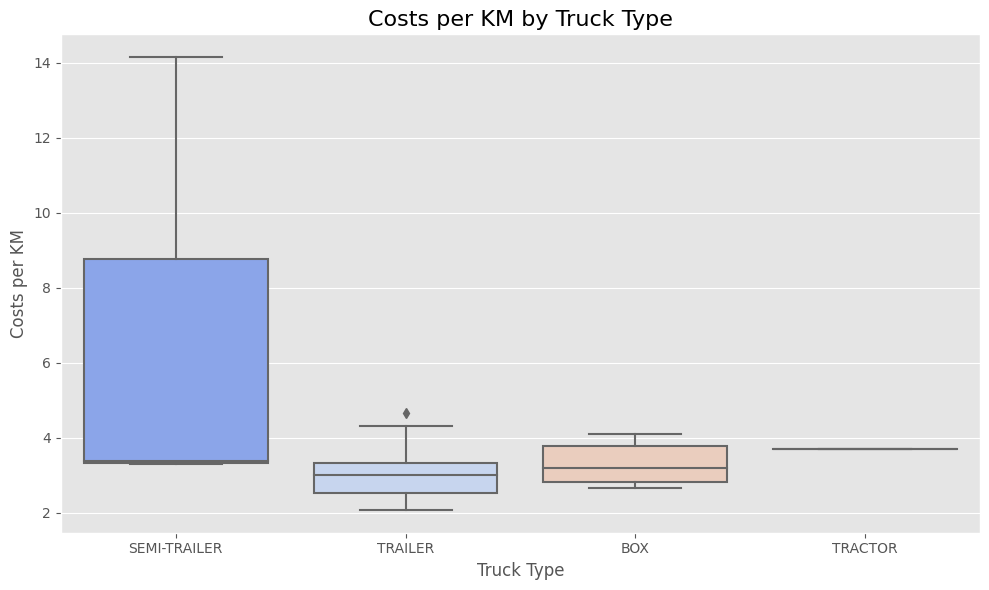

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_log2, x='Truck Type', y='Costs per KM', palette='coolwarm')
plt.title('Costs per KM by Truck Type', fontsize=16)
plt.xlabel('Truck Type', fontsize=12)
plt.ylabel('Costs per KM', fontsize=12)
plt.tight_layout()
plt.show()

**Semi-trailer:** This truck type shows the highest variability in costs per KM, with a wide range and potential outliers at higher cost values. The median cost is around 3.5-4, but the upper whisker extends significantly, indicating some instances of much higher costs.

**Trailer:** The "Trailer" truck type has a lower median cost per KM compared to the Semi-trailer and a tighter distribution, indicating more consistent costs. The costs generally fall between approximately 2.5 and 3.5 per KM.

**Box:** Similar to the Trailer, the "Box" truck type also shows a relatively consistent cost per KM, with a slightly higher median than the Trailer, around 3.0 to 3.5 per KM. The range of costs is also quite narrow.

**Tractor:** The "Tractor" truck type exhibits the lowest and most consistent costs per KM, with a very narrow range, suggesting highly predictable and low operating costs per kilometer. The median cost appears to be just under 4 per KM.


In summary, the graph suggests that Semi-trailers have the most variable and potentially highest costs per KM, while Tractors have the lowest and most consistent costs per KM among the truck types shown.

# (III) *Determine net profit and net profit per trip by Truck Type*

In [49]:
merged_log_profit = merged_log.groupby('Truck Type')['Net Profit'].mean().astype(int).sort_values(ascending = False)
merged_log_profit1 = merged_log_profit.reset_index()
merged_log_profit1

,Truck Type,Net Profit
0,TRACTOR,506934133
1,SEMI-TRAILER,344263138
2,TRAILER,210100050
3,BOX,195225563


In [50]:
net_profit_per_trip = merged_log_profit1.merge(f_details_4_Trips1, how = 'left', on = 'Truck Type')
net_profit_per_trip1 = net_profit_per_trip.rename(columns = {'Plate' : 'Number of Trips'})
net_profit_per_trip1['Net Profit per Trip'] = net_profit_per_trip1['Net Profit'] / net_profit_per_trip1['Number of Trips'].astype(int)
net_profit_per_trip1.sort_values(by = 'Net Profit per Trip', ascending = False)

,Truck Type,Net Profit,Number of Trips,Net Profit per Trip
0,TRACTOR,506934133,711,712987.528833
1,SEMI-TRAILER,344263138,2941,117056.490309
3,BOX,195225563,15153,12883.624563
2,TRAILER,210100050,73255,2868.064296


# (IV) *Reasons for Tractor Trucks' High Profitability*

**Designed for Heavy Loads**
* Tractor trucks are engineered to haul large and heavy shipments, making them ideal for industries that require bulk transportation.

**Economies of Scale in Long-Haul Operations**
* Tractors are best suited for long-distance routes, where operating costs (fuel, maintenance, labor) are distributed over more kilometers.

* This reduces the cost-per-kilometer, improving efficiency and profitability.

**Higher Revenue per Trip**
* Since tractors can carry greater volumes in one journey, they command higher rates per trip compared to smaller trucks.

* This leads to better margins, especially on high-demand, long-haul lanes.

**Net Profit Per Trip Advantage**
* Few Trips, High Revenue

* Unlike smaller trucks that may need multiple trips to deliver the same quantity, a single tractor trip often achieves the same (or greater) revenue.

**Route Optimization**
* Tractors are typically assigned to high-revenue, optimized routes (e.g., long hauls, interstate, or dedicated contracts), ensuring maximum return on each operation.

**Combined Revenue & Cost Efficiency**
* The ability to generate significant revenue in one trip, while keeping per-kilometer costs low, creates substantial profit margins per operation.

# (V) *Top performing drivers who covered the most distances*

In [51]:
f_cost_DriverID[['Driver', 'KM Traveled']].sort_values(by = 'KM Traveled',ascending = False).reset_index().head(5)

,index,Driver,KM Traveled
0,1,Ridwan Greaves,114009
1,11,Yasin Buck,111863
2,4,Amman Vega,111137
3,8,Maheen Nicholls,109887
4,9,Stevie Schofield,89585


**Role of High-Distance Drivers in Revenue Generation**

**Significant Contribution to Revenue**

* Drivers covering the greatest distances directly boost revenue by transporting larger volumes of goods over longer hauls.

* The combination of high mileage and full vehicle utilization ensures maximum output from each trip.

**Maximizing Fleet Utilization**

* High-distance drivers enable fleets to achieve consistent vehicle usage, reducing idle time and increasing overall operational efficiency.

* Their ability to handle long-haul assignments ensures that trucks operate at or near full load capacity, optimizing profitability.

**Time & Schedule Efficiency**

* These drivers are typically skilled at time management, ensuring adherence to schedules and minimizing delays.

* Their efficiency in completing trips on time contributes to higher trip completion rates and improved customer satisfaction.

# (VI) Top-Performing Trucks (by Net Profit)

In [52]:
merged_log2[['Truck ID','Net Profit', 'Net Revenue','Total Costs']].sort_values(by = 'Net Profit', ascending = False).head(5)

,Truck ID,Net Profit,Net Revenue,Total Costs
6,17,506934133.0,507372900.0,438767.68
1,3,485772786.0,486007640.0,234854.19
0,2,465986182.0,466361310.0,375128.23
9,22,376914790.0,377164460.0,249670.30
17,37,355517898.0,355654320.0,136422.21


# (VII) Underperforming Trucks (by Net Profit):

In [53]:
merged_log2[['Truck ID','Net Profit', 'Net Revenue','Total Costs']].sort_values(by = 'Net Profit', ascending = True).head(5)

,Truck ID,Net Profit,Net Revenue,Total Costs
4,6,28262655.0,28282360.0,19705.79
3,5,53113216.0,53182760.0,69544.09
5,7,63481004.0,63550980.0,69976.69
12,28,77291191.0,77387650.0,96459.46
19,42,80222551.0,80278490.0,55939.13


# (VIII) *What is the geographic distribution of customers, and which cities have a significantly high concentration of high-value goods?*

# (*) Top 10 Cities by Goods Value

In [54]:
f_details_CustomerID['Goods Value'] = f_details_CustomerID['Goods Value'].astype(int)
top_10_cities = f_details_CustomerID[['City', 'Goods Value']].sort_values(by = 'Goods Value', ascending = False).drop_duplicates().head(10)
top_10_cities

,City,Goods Value
26,Bloom,2160496032
232,Sandy Lane,775815137
166,Mineola,656562087
77,Enders,603641309
162,Mcmechen,519486818
124,Irving,481551402
12,Banner Crest,450589138
113,Herrings Crossroads,416256993
295,Yucca Valley,403288542
85,Farmers,374740250


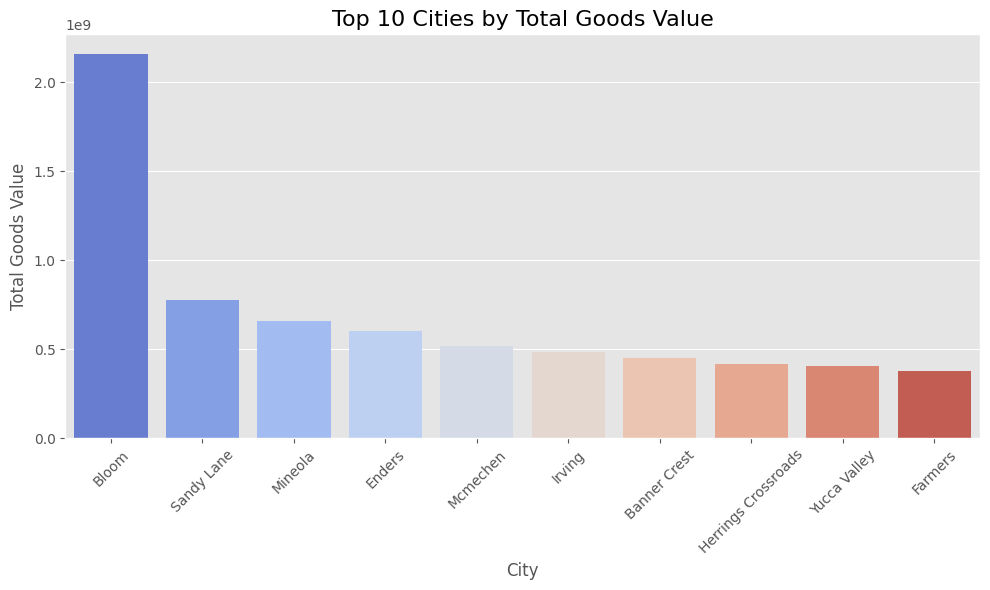

In [55]:
top_cities = top_10_cities.nlargest(10, 'Goods Value')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_cities, x='City', y='Goods Value', palette='coolwarm')
plt.title('Top 10 Cities by Total Goods Value', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Goods Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (**) Cities with the Most Customers:

In [56]:
dimension_tab3.groupby('City')['Customer ID'].nunique().sort_values(ascending = False).head(10).reset_index()

,City,Customer ID
0,Meadowlakes,4804
1,Mineola,2513
2,Bloom,2408
3,Herrings Crossroads,2190
4,Enders,1441
5,Wheatland,1254
6,Yucca Valley,880
7,Tower Point,802
8,Farmers,767
9,Sandy Lane,763


# (***) **Plot the Geographic distribution: Scatter plot of Latitude and Longitude**

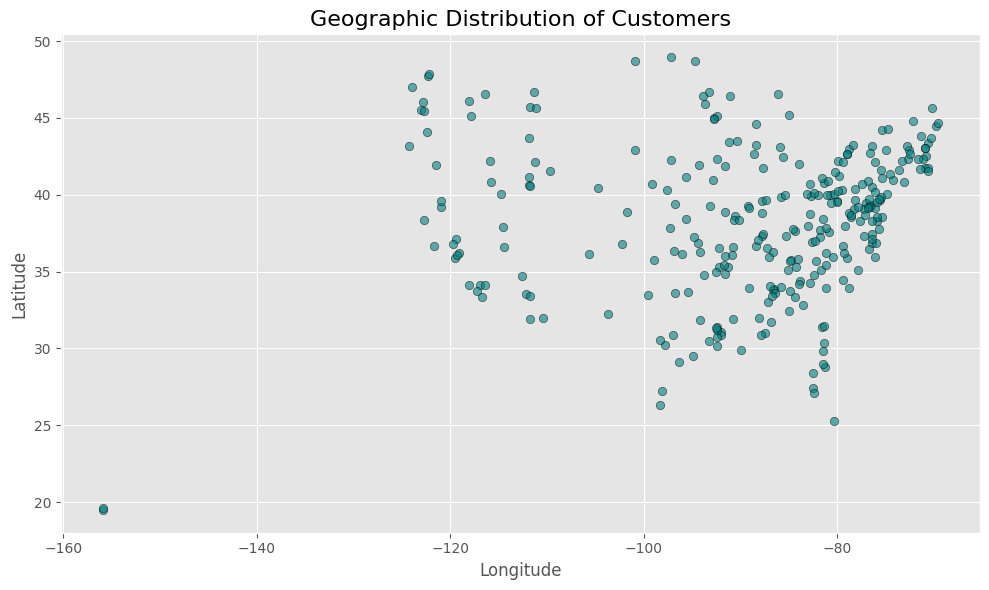

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(f_details_CustomerID['Longitude'], f_details_CustomerID['Latitude'], alpha=0.6, color='teal', edgecolor='black')
plt.title('Geographic Distribution of Customers', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

Cities such as Mineola, Bloom, Yucca Valley, and Sandy Lane appear on both the list of top cities by goods value and the list of cities with the most customers, highlighting their strategic role in operations.

**Dual Contribution to Revenue**

These cities generate revenue through a high volume of customers as well as high-value shipments.

The overlap suggests that they are not only demand centers but also critical for handling premium goods.

**Logistical and Market Hubs**

Their position indicates a likely role as logistical hubs or regional market centers, supporting both large-scale distribution and customer service.

This dual role strengthens supply chain efficiency and market penetration.

**Operational Priorities**

Cities with this overlap should be considered high-priority locations for investment in fleet capacity, warehousing, and service reliability.

Ensuring optimized routes, strong infrastructure, and reliable delivery here can yield outsized returns for the organization.

# (IX) *Which truck types are the most fuel-efficient (highest KM per Liter), and how does fuel efficiency relate to revenue or profit?*

In [58]:
fuel_efficiency_by_type = merged_log2.groupby('Truck Type')['KM per Liter'].mean().sort_values(ascending=False)
fuel_efficiency_by_type.reset_index()

,Truck Type,KM per Liter
0,TRAILER,5.437530
1,BOX,4.188198
2,SEMI-TRAILER,3.423233
3,TRACTOR,2.961454


In [59]:
KM_Travelled_truck_type = merged_log2.groupby('Truck Type')['KM Traveled'].mean().sort_values(ascending=False)
KM_Travelled_truck_type.reset_index()

,Truck Type,KM Traveled
0,TRACTOR,118548.000000
1,SEMI-TRAILER,63264.666667
2,BOX,51156.000000
3,TRAILER,43852.571429


In [60]:
Net_profit_truck_type = merged_log2.groupby('Truck Type')['Net Profit'].mean().sort_values(ascending=False).astype(int)
Net_profit_truck_type.reset_index()

,Truck Type,Net Profit
0,TRACTOR,506934133
1,SEMI-TRAILER,344263138
2,TRAILER,210100050
3,BOX,195225563


# (IX.1) *Check for correlation between KM per Liter and Net Profit/ Net Revenue*

In [61]:
correlation_profit = merged_log2['KM per Liter'].corr(merged_log2['Net Profit'])
correlation_revenue = merged_log2['KM per Liter'].corr(merged_log2['Net Revenue'])

print("\nCorrelation between KM per Liter and Net Profit:", correlation_profit)
print("Correlation between KM per Liter and Net Revenue:", correlation_revenue)


Correlation between KM per Liter and Net Profit: -0.35592644144890023
Correlation between KM per Liter and Net Revenue: -0.3560604926130433


Profitability vs. Fuel Efficiency: Key Insights

The analysis reveals that trailers are the most fuel-efficient vehicles, yet there is no clear correlation between KM per Liter (fuel efficiency) and net profit/net revenue. At the same time, tractors record the highest net profit. This highlights some important operational dynamics:

**1. Fuel Efficiency ≠ Profitability**

While trailers minimize fuel consumption per kilometer, their revenue potential is limited by lower load capacity or assignment to less profitable routes.

Profitability is therefore not solely determined by operational cost efficiency.

**2. Revenue Generation as the Key Driver**

Tractors achieve the largest net profit because they are capable of transporting higher-value goods and larger loads in fewer trips.

Their role is optimized for revenue-maximizing routes, even if fuel consumption per kilometer is higher.

**3. Operational Strategy in Fleet Deployment**

The results suggest that fleet assignment strategy prioritizes maximizing revenue rather than minimizing fuel costs.

Tractors are positioned for long-haul, high-value operations, while trailers may be used for cost-efficient but lower-revenue tasks.


# (IX.2) **What is the correlation between the total distance traveled (KM Traveled) and the net profit for each truck type?¶Group data by Truck Type and calculate correlation**


In [62]:
correlation_profitKM = merged_log2['KM Traveled'].corr(merged_log2['Net Profit'])
correlation_revenueKM = merged_log2['KM Traveled'].corr(merged_log2['Net Revenue'])

print("\nCorrelation between KM Traveled and Net Profit:", correlation_profitKM)
print("Correlation between KM Traveled and Net Revenue:", correlation_revenueKM)


Correlation between KM Traveled and Net Profit: 0.8068190594030809
Correlation between KM Traveled and Net Revenue: 0.8070487017054204


Correlation Between KM Traveled and Profitability

**Correlation Values**

KM Traveled & Net Profit: 0.807

KM Traveled & Net Revenue: 0.807

These strong positive correlations highlight a consistent relationship across all truck types.

**1. Revenue Growth with Distance**

Longer distances allow trucks to transport more goods and complete higher-value shipments, directly increasing revenue.

The relationship holds across all truck types, confirming distance as a key driver of financial performance.

**2. Profitability Gains Through Cost Distribution**

Fixed costs (e.g., salaries, depreciation, insurance) are spread over more kilometers as distance increases.

This reduces the cost-per-kilometer, which in turn improves overall profit margins.

**3. Operational Implication**

High-distance routes maximize both revenue and profitability, reinforcing the importance of efficient long-haul operations in fleet strategy.

Ensuring optimal route allocation and minimizing downtime becomes critical for sustaining high profit margins.


# (IX.3) *Which trucks incur the highest maintenance costs per kilometer, and how does that impact overall profitability?¶Identify top trucks with highest Maintenance Cost per KM*


In [63]:
top_maintenance_costs = merged_log2.nlargest(5, 'Maintenance per KM')[['Truck ID', 'Truck Type', 'Maintenance per KM', 'Net Profit']]
top_maintenance_costs

,Truck ID,Truck Type,Maintenance per KM,Net Profit
16,36,SEMI-TRAILER,1.713247,81030448.0
4,6,BOX,0.758356,28262655.0
21,44,TRAILER,0.500165,119117748.0
3,5,TRAILER,0.463001,53113216.0
15,34,BOX,0.411031,278796768.0


# (IX.4) *Correlation between Maintenance per KM and Net Profit*

In [64]:
correlation_maintenance_profit = merged_log2['Maintenance per KM'].corr(merged_log2['Net Profit'])
print("\nCorrelation between Maintenance Cost per KM and Net Profit:", correlation_maintenance_profit)


Correlation between Maintenance Cost per KM and Net Profit: -0.3456862357601922


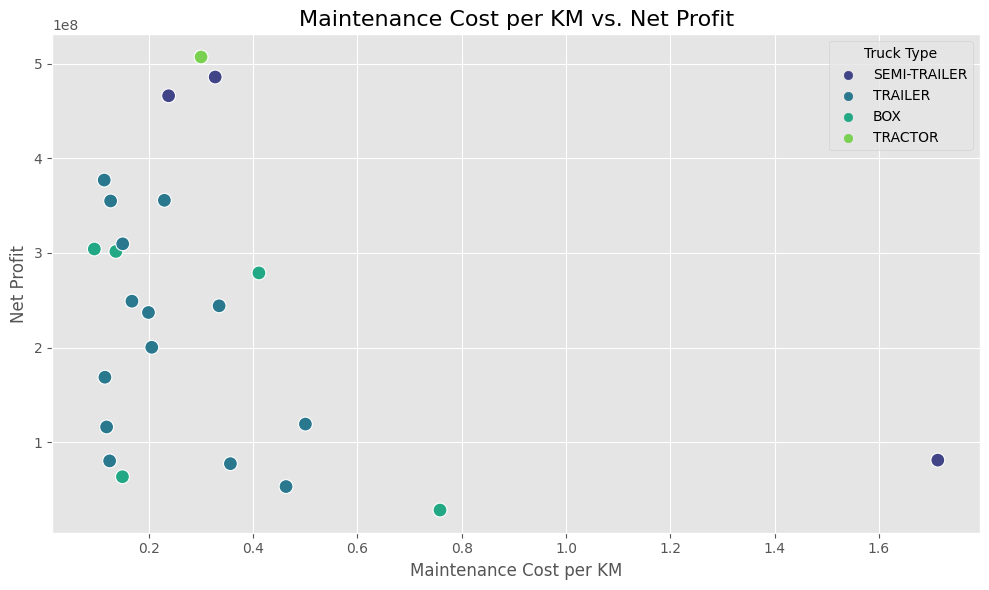

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_log2, x='Maintenance per KM', y='Net Profit', hue='Truck Type', palette='viridis', s=100)
plt.title('Maintenance Cost per KM vs. Net Profit', fontsize=16)
plt.xlabel('Maintenance Cost per KM')
plt.ylabel('Net Profit')
plt.legend(title='Truck Type')
plt.tight_layout()
plt.show()

Correlation Between Maintenance Cost per KM and Net Profit

**Correlation Value: –0.346 (moderate negative correlation)**

**1. Interpretation**

The negative correlation indicates that as maintenance cost per kilometer increases, net profit decreases.

Although the relationship is not extremely strong, it is statistically meaningful, showing that maintenance costs are an important factor in profitability.

**2. Operational Impact**

Higher maintenance costs increase overall operational expenses, which reduces profit margins.

Trucks with higher repair needs may also suffer from downtime and reduced availability, further limiting revenue generation.

**3. Strategic Implication**

While other factors (such as distance traveled and goods value) have a stronger influence on profit, maintenance efficiency still plays a critical role in sustaining profitability.

Keeping maintenance costs under control can help improve margins, especially for high-mileage vehicles.

# (IX.5) *Are there any trucks consistently performing below the average across key metrics like fuel efficiency, costs, or revenue?*
Calculate the overall averages for key metrics

In [66]:
metrics = ['KM per Liter', 'Costs per KM', 'Net Revenue']
averages = merged_log2[metrics].mean()
averages

KM per Liter    4.795546e+00
Costs per KM    3.692576e+00
Net Revenue     2.374358e+08
dtype: float64

# (IX.6) *Flag trucks below average across all key metrics and filter consistently underperforming trucks*

In [67]:
merged_log2['Below Average'] = merged_log2.apply(
    lambda row: all(row[metric] < averages[metric] for metric in metrics),
    axis=1
)

underperforming_trucks = merged_log2[merged_log2['Below Average']]
print("Consistently Underperforming Trucks:")
underperforming_trucks[['Truck ID', 'Truck Type'] + metrics]


Consistently Underperforming Trucks:


,Truck ID,Truck Type,KM per Liter,Costs per KM,Net Revenue
5,7,BOX,4.399416,3.180036,63550980.0


# (X) *Are there any customers or cities responsible for a disproportionate share of low-value or high-value shipments?*
# (X.1) **Calculate total Goods Value and proportions**

In [68]:
customer_goods = f_details_CustomerID.groupby('Customer ID')['Goods Value'].sum().reset_index()
city_goods = f_details_CustomerID.groupby('City')['Goods Value'].sum().reset_index()
total_goods_value = f_details_CustomerID['Goods Value'].sum()
customer_goods['Proportion'] = customer_goods['Goods Value'] / total_goods_value
city_goods['Proportion'] = city_goods['Goods Value'] / total_goods_value

top_high_value = high_value_cities.nlargest(5, 'Proportion')

plt.figure(figsize=(8, 8))
plt.pie(top_high_value['Proportion'], labels=top_high_value['City'], autopct='%1.1f%%', startangle=140)
plt.title('Top Contributors to High-Value Shipments', fontsize=16)
plt.show()

# (X.2) *Identify low-value and high-value contributors*


In [69]:
low_value_threshold = f_details_CustomerID['Goods Value'].quantile(0.25)  
high_value_threshold = f_details_CustomerID['Goods Value'].quantile(0.75)  
low_value_cities = city_goods[city_goods['Goods Value'] < low_value_threshold]
high_value_cities = city_goods[city_goods['Goods Value'] > high_value_threshold]

# (X.3) *Find disproportionate contributors*

In [70]:
disproportionate_low = low_value_cities[low_value_cities['Proportion'] > 0.1]
disproportionate_high = high_value_cities[high_value_cities['Proportion'] > 0.1]

print("Cities with Disproportionate Low-Value Shipments:")
print(disproportionate_low)

print("\nCities with Disproportionate High-Value Shipments:")
print(disproportionate_high)

Cities with Disproportionate Low-Value Shipments:
Empty DataFrame
Columns: [City, Goods Value, Proportion]
Index: []

Cities with Disproportionate High-Value Shipments:
        City  Goods Value  Proportion
26     Bloom   2160496032    0.174961
165  Mineola   1313124174    0.106339


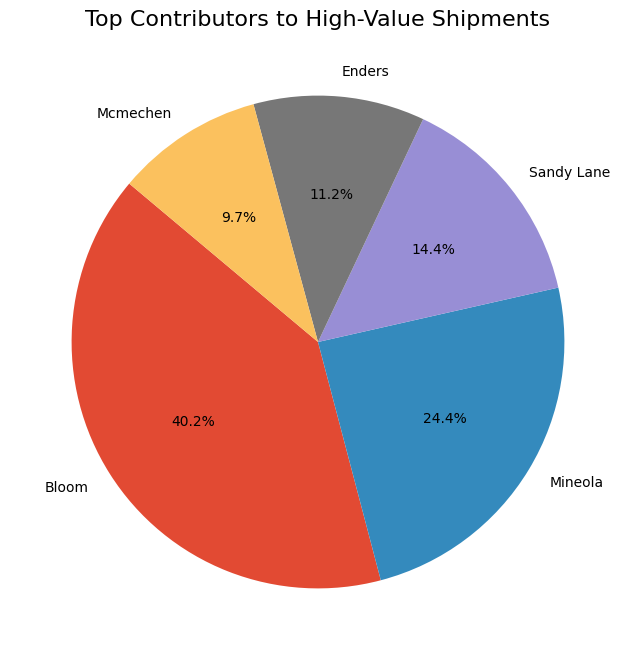

In [71]:
top_high_value = high_value_cities.nlargest(5, 'Proportion')

plt.figure(figsize=(8, 8))
plt.pie(top_high_value['Proportion'], labels=top_high_value['City'], autopct='%1.1f%%', startangle=140)
plt.title('Top Contributors to High-Value Shipments', fontsize=16)
plt.show()


# **Step6: Recommendations**

**1. Fleet Deployment Strategy****


Tractors: Assign to high-revenue, long-distance routes, where their higher load capacity and revenue potential outweigh fuel efficiency concerns.

Trailers: Deploy for cost-sensitive, medium-distance routes to capitalize on their superior fuel efficiency and lower operating costs.

Fleet Expansion: Maintain a balanced mix of tractors and trailers to serve both revenue-driven and cost-sensitive operations.

**2. Strategic City Investments**

Overlapping Cities: Mineola, Bloom, Yucca Valley, and Sandy Lane are strategically important due to high goods value and large customer bases.

Action: Invest in warehousing, distribution centers, and last-mile infrastructure in these regions to improve service reliability and revenue growth.

Customer Focus: Enhance customer relationships in these cities with value-added services such as express delivery or flexible scheduling.

**3. Vehicle Performance Management**

Underperforming Truck (7): Conduct a detailed diagnostic for inefficiencies (fuel, maintenance, or route assignment).

Action: If issues persist, consider replacing with modern, fuel-efficient vehicles to reduce operational costs.

Maintenance Control: Implement preventive maintenance schedules to minimize repair costs, breakdowns, and downtime.

**4. Driver Optimization**

Top Drivers: Assign the best-performing drivers to high-priority routes and vehicles to maximize revenue.

Knowledge Transfer: Use these drivers as mentors/trainers for underperforming drivers, focusing on fuel-efficient driving and time management.

**5. Route & Load Planning**


Efficiency Focus: Improve load utilization to maximize revenue per trip.

Empty Kilometers: Reduce wasted capacity by securing backhaul opportunities and optimizing route planning.

Find disproportionate contributors